# Analysis of water quality at Hotel H10 big sur

During my summer holidays (23-27 JUL 2018) in [Hotel H10 Big Sur Hotel Boutique](https://www.h10hotels.com/es/hoteles-tenerife/h10-big-sur) I realized that the water quality parameters were exposed in a board and I [took a picture](./raw_data.jpg) of that.
Here you have a brief analysis of the collected data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings("ignore")

## Loading data

In [5]:
df = pd.read_csv("water_quality.csv", index_col="datetime", parse_dates=True)
df

,hm_free_chlorine,hm_mixed_chlorine,hm_pH,hm_turbidity,pool_free_chlorine,pool_mixed_chlorine,pool_pH,pool_turbidity
datetime,,,,,,,,
2018-07-20 08:00:00,1.30,0.15,7.91,1.22,1.36,0.25,7.51,0.17
2018-07-20 14:00:00,2.00,0.28,7.20,3.40,0.87,0.22,7.47,0.33
2018-07-21 08:00:00,1.50,0.25,7.55,2.80,1.90,0.30,7.52,0.60
2018-07-21 14:00:00,1.49,0.19,7.50,0.98,1.87,0.20,7.47,0.69
2018-07-22 08:00:00,2.00,0.60,7.70,3.15,1.84,0.25,7.58,0.46
2018-07-22 14:00:00,1.99,0.30,7.50,1.02,1.80,0.20,7.50,0.40
2018-07-23 08:00:00,1.90,0.28,7.52,1.00,1.64,0.25,7.61,0.15
2018-07-23 14:00:00,1.91,0.21,7.74,1.15,1.62,0.12,7.65,0.42
2018-07-24 08:00:00,1.22,0.17,7.46,2.04,2.06,0.09,7.53,0.16


## Categorizing each source & resampling dates

In [6]:
df_hydromassage = df.filter(regex="hm.*")
df_hydromassage.columns = df_hydromassage.columns.str.replace("hm_", "")
df_hydromassage = df_hydromassage.resample("D").mean()
df_hydromassage["source"] = "hydromassage"

df_outdoorpool = df.filter(regex="pool.*")
df_outdoorpool.columns = df_outdoorpool.columns.str.replace("pool_", "")
df_outdoorpool = df_outdoorpool.resample("D").mean()
df_outdoorpool["source"] = "outdoorpool"

df2 = pd.concat((df_hydromassage, df_outdoorpool))
df2 = df2.reset_index().set_index(["source", "datetime"])

In [7]:
df2

free_chlorine  mixed_chlorine     pH  turbidity
source       datetime                                                   
hydromassage 2018-07-20          1.650           0.215  7.555      2.310
             2018-07-21          1.495           0.220  7.525      1.890
             2018-07-22          1.995           0.450  7.600      2.085
             2018-07-23          1.905           0.245  7.630      1.075
             2018-07-24          1.210           0.160  7.480      1.920
             2018-07-25          1.500           0.170  7.590      1.000
             2018-07-26          1.565           0.235  7.645      3.250
outdoorpool  2018-07-20          1.115           0.235  7.490      0.250
             2018-07-21          1.885           0.250  7.495      0.645
             2018-07-22          1.820           0.225  7.540      0.430
             2018-07-23          1.630           0.185  7.630      0.285
             2018-07-24          1.980           0.130  7.515      0.330
             2018-07-25          1.940           0.230  7.510      0.185
             2018-07-26          1.520           0.155  7.555      0.440

## Plotting all variables

In [8]:
df3 = df2.reset_index().melt(id_vars=["source", "datetime"])
df3.head()

,source,datetime,variable,value
0,hydromassage,2018-07-20,free_chlorine,1.650
1,hydromassage,2018-07-21,free_chlorine,1.495
2,hydromassage,2018-07-22,free_chlorine,1.995
3,hydromassage,2018-07-23,free_chlorine,1.905
4,hydromassage,2018-07-24,free_chlorine,1.210


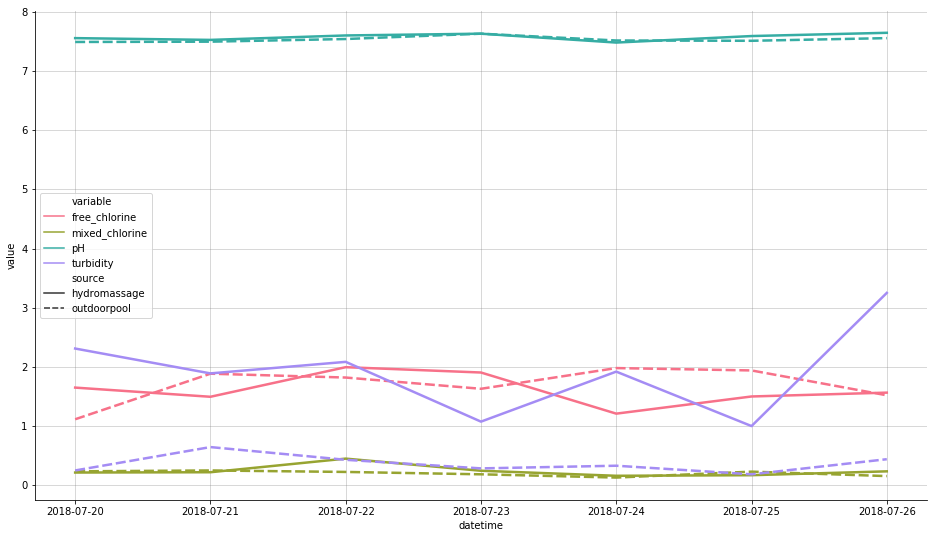

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
palette = sns.color_palette("husl", 4)
ax.grid(color="gray", linestyle="-", linewidth=1, alpha=.3)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
sns.lineplot(x="datetime", y="value", hue="variable", style="source", data=df3, palette=palette, linewidth=2.5);

## Plotting deltas of variables

In [10]:
df4 = df2.reset_index().set_index("datetime").groupby("source").rolling(2).apply(lambda x: x[1]-x[0]).dropna()
df4

free_chlorine  mixed_chlorine     pH  turbidity
source       datetime                                                   
hydromassage 2018-07-21         -0.155           0.005 -0.030     -0.420
             2018-07-22          0.500           0.230  0.075      0.195
             2018-07-23         -0.090          -0.205  0.030     -1.010
             2018-07-24         -0.695          -0.085 -0.150      0.845
             2018-07-25          0.290           0.010  0.110     -0.920
             2018-07-26          0.065           0.065  0.055      2.250
outdoorpool  2018-07-21          0.770           0.015  0.005      0.395
             2018-07-22         -0.065          -0.025  0.045     -0.215
             2018-07-23         -0.190          -0.040  0.090     -0.145
             2018-07-24          0.350          -0.055 -0.115      0.045
             2018-07-25         -0.040           0.100 -0.005     -0.145
             2018-07-26         -0.420          -0.075  0.045      0.255

In [11]:
df5 = df4.reset_index().melt(id_vars=["source", "datetime"])
df5.head()

,source,datetime,variable,value
0,hydromassage,2018-07-21,free_chlorine,-0.155
1,hydromassage,2018-07-22,free_chlorine,0.500
2,hydromassage,2018-07-23,free_chlorine,-0.090
3,hydromassage,2018-07-24,free_chlorine,-0.695
4,hydromassage,2018-07-25,free_chlorine,0.290


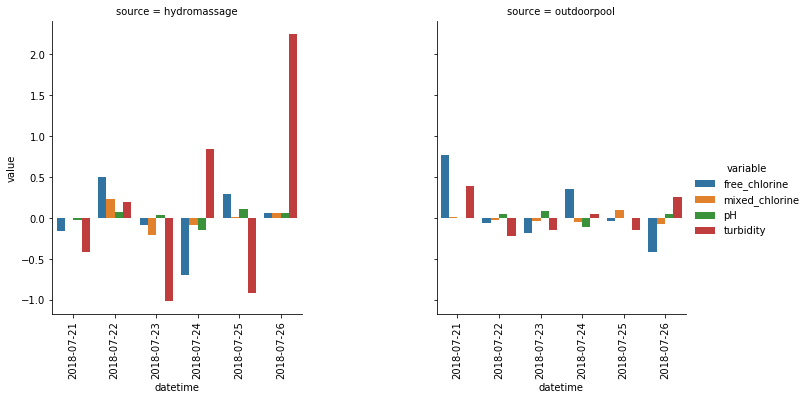

In [26]:
g = sns.catplot(x="datetime", y="value", hue="variable", col="source", data=df5, kind="bar")
g.set_xticklabels(df5["datetime"].astype(str), rotation=90);

## Correlation Matrix

In [16]:
df2.groupby("source").corr()

free_chlorine  mixed_chlorine        pH  \
source                                                                 
hydromassage free_chlorine        1.000000        0.798103  0.683270   
             mixed_chlorine       0.798103        1.000000  0.386906   
             pH                   0.683270        0.386906  1.000000   
             turbidity           -0.103321        0.177151  0.113734   
outdoorpool  free_chlorine        1.000000       -0.137107 -0.026242   
             mixed_chlorine      -0.137107        1.000000 -0.386929   
             pH                  -0.026242       -0.386929  1.000000   
             turbidity            0.233574        0.154335 -0.147522   

                             turbidity  
source                                  
hydromassage free_chlorine   -0.103321  
             mixed_chlorine   0.177151  
             pH               0.113734  
             turbidity        1.000000  
outdoorpool  free_chlorine    0.233574  
             mixed_chlorine   0.154335  
             pH              -0.147522  
             turbidity        1.000000

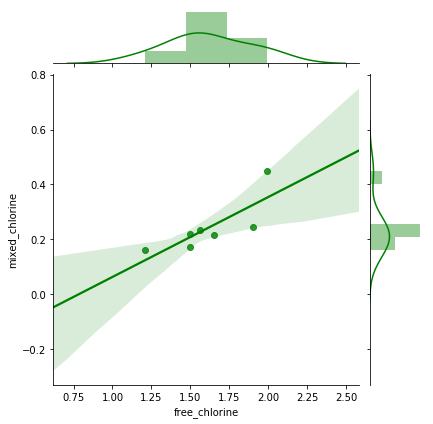

In [17]:
sns.jointplot(x="free_chlorine", y="mixed_chlorine", data=df2.loc["hydromassage"], kind="reg", color="green");

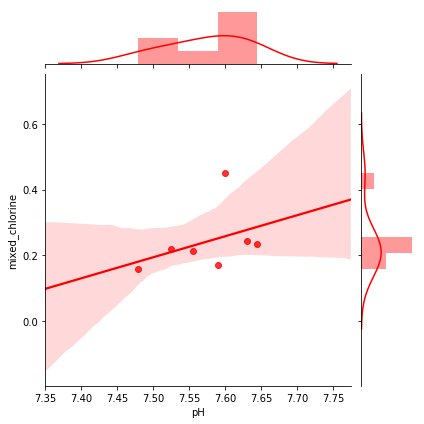

In [18]:
sns.jointplot(x="pH", y="mixed_chlorine", data=df2.loc["hydromassage"], kind="reg", color="red");

## Comparing global means of variables

In [19]:
df6 = data=df2.groupby("source").mean()
df6 = df6.reset_index().melt(id_vars=["source"])
df6.head()

,source,variable,value
0,hydromassage,free_chlorine,1.617143
1,outdoorpool,free_chlorine,1.698571
2,hydromassage,mixed_chlorine,0.242143
3,outdoorpool,mixed_chlorine,0.201429
4,hydromassage,pH,7.575000


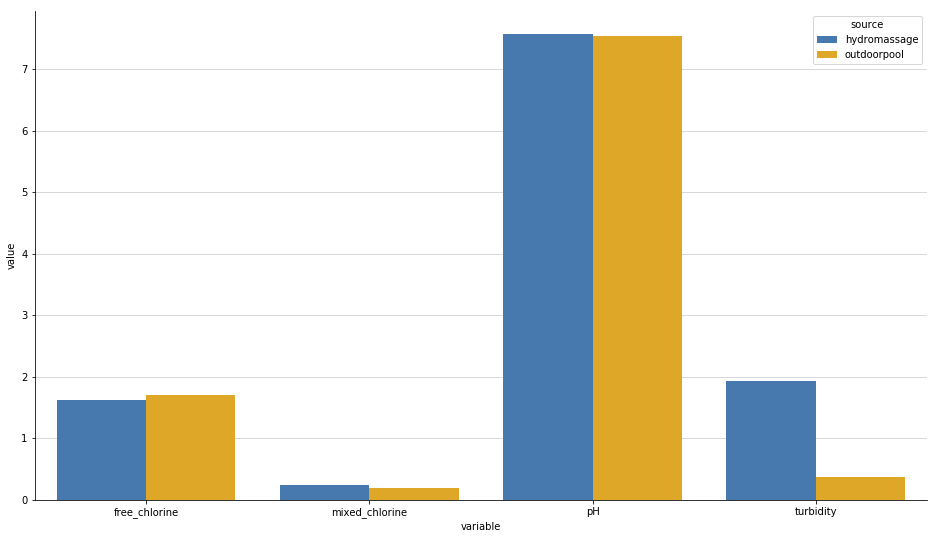

In [32]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.grid(color="gray", linestyle="-", linewidth=1, alpha=.3)
ax.set_axisbelow(True)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
# palette
colors = ["windows blue", "amber"]
palette = sns.xkcd_palette(colors)
sns.barplot(x="variable", y="value", hue="source", data=df6, palette=palette);